<a href="https://colab.research.google.com/github/Teerawa-ctrl/-ENGCE117-Computer-Programming-for-Computer-Engineer/blob/main/Clean_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [1]:
!pip install easyocr opencv-python-headless
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 41.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [2]:
import os
import cv2
import easyocr
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import shutil

In [3]:
languages = ['th','en']
use_gpu = True
reader = easyocr.Reader(languages, gpu = use_gpu )

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -O THSarabunNew.ttf

--2024-07-17 15:24:35--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-07-17 15:24:36--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘THSarabunNew.ttf’

THSarabunNew.ttf    100%[===================>]  96.00K  --.-KB/s    in 0.005s  

2024-07-17 15:24:36 (18.7 MB/s) - ‘THSar

#EASYOCR

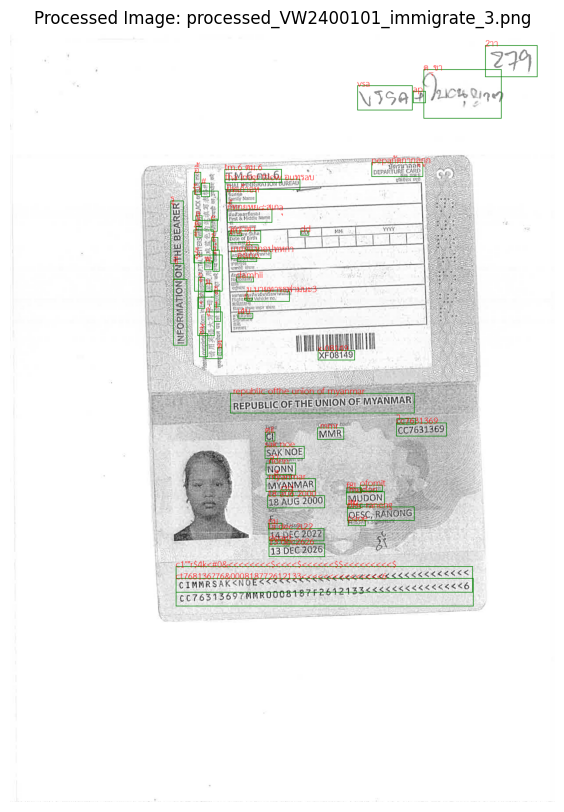

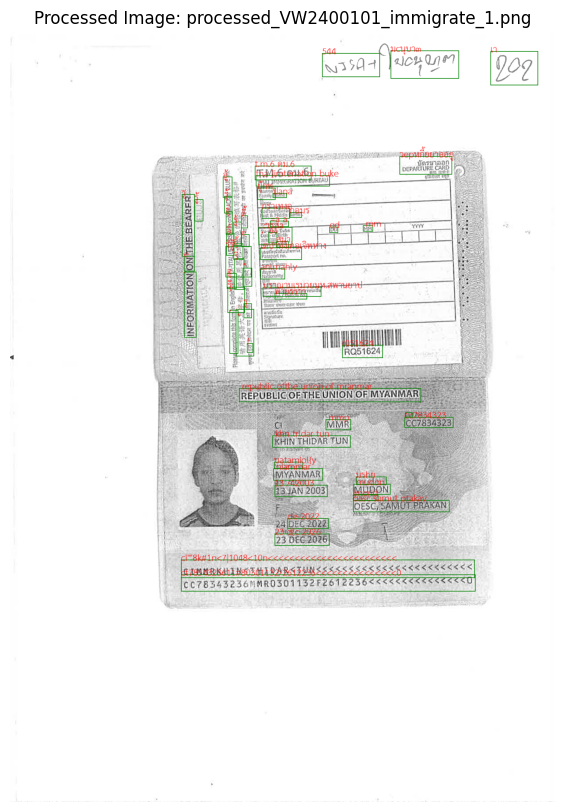

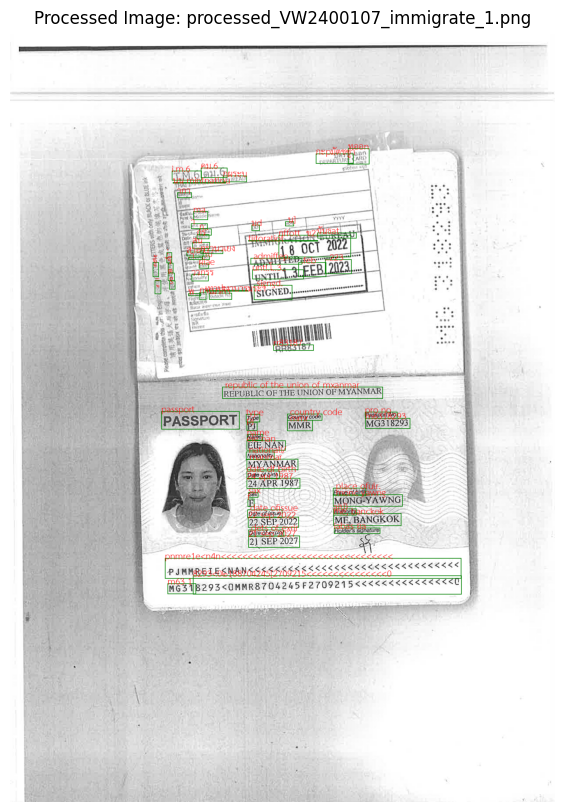

In [ ]:
import os
import cv2
import easyocr
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt



def process_images_with_easyocr(input_folder, output_folder):
    # สร้างโฟลเดอร์สำหรับบันทึกผลลัพธ์ถ้ายังไม่มี
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # โหลดฟอนต์ Sarabun สำหรับใช้ในการแสดงข้อความภาษาไทย
    font_path = './THSarabunNew.ttf'
    font = ImageFont.truetype(font_path, 26)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_folder, filename)

            # อ่านรูปภาพ
            image = cv2.imread(image_path)
            image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(image_pil)

            results = reader.readtext(image)

            # สร้างกรอบรอบคำที่อ่านได้
            for (bbox, text, prob) in results:
                (top_left, top_right, bottom_right, bottom_left) = bbox
                top_left = tuple(map(int, top_left))
                bottom_right = tuple(map(int, bottom_right))

                draw.rectangle([top_left, bottom_right], outline="green", width=2)
                draw.text((top_left[0], top_left[1] - 30), text, font=font, fill=(255, 0, 0, 255))

            # แปลงภาพกลับมาเป็นรูปแบบที่ OpenCV รองรับ
            image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

            # บันทึกรูปภาพที่มีกรอบรอบคำที่อ่านได้
            output_image_path = os.path.join(output_folder, f'processed_{filename}')
            cv2.imwrite(output_image_path, image)

            # แสดงภาพที่มีกรอบรอบคำที่อ่านได้
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Processed Image: {filename}')
            plt.show()

# กำหนดโฟลเดอร์สำหรับอินพุตและเอาต์พุต
input_folder = '/content/immigrate'
output_folder = '/content/easyocr_immigrate'

process_images_with_easyocr(input_folder, output_folder)





#DOWNLOAD FOLDER AS ZIP

In [ ]:
|from google.colab import files
# สร้างไฟล์ ZIP ของโฟลเดอร์เอาต์พุต
shutil.make_archive(output_folder, 'zip', output_folder)

# ดาวน์โหลดไฟล์ ZIP
files.download(f'{output_folder}.zip')

In [ ]:
print(input_folder)